In [1]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.2.0-rc2


In [0]:
# More imports
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [0]:
# Build the model
i = Input(shape=x_train[0].shape)
x = LSTM(128)(i)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

In [6]:
# Compile and train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.1697 - accuracy: 0.9483 - val_loss: 0.1174 - val_accuracy: 0.9653
Epoch 2/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0890 - accuracy: 0.9725 - val_loss: 0.0820 - val_accuracy: 0.9753
Epoch 3/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0668 - accuracy: 0.9790 - val_loss: 0.0684 - val_accuracy: 0.9788
Epoch 4/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0517 - accuracy: 0.9841 - val_loss: 0.0537 - val_accuracy: 0.9829
Epoch 5/5
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0439 - accuracy: 0.9862 - val_loss: 0.0502 - val_accuracy: 0.9849


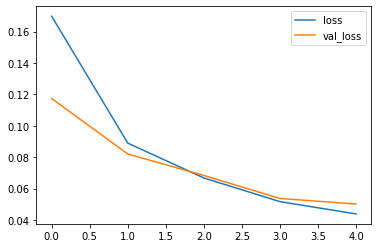

In [7]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

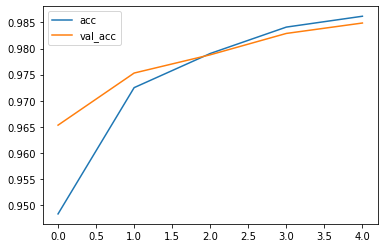

In [8]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()